# Journal 2022-09-22

In [1]:
%load_ext autoreload
%autoreload 2

In [34]:
import os
from glob import glob
import numpy as np
import scipy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import jax
import jax.numpy as jnp
import tensorflow_probability.substrates.jax as tfp

# Sheaves
Some papers on sheaves below, the Ghrist ones are the fundamental theory and the Bodnar ones recent applications to graph neural networks.  Look at the 'sheaf neural networks with connection laplacians' paper for doing an implementation later.

In [3]:
import arxiv

In [28]:
doc_ids = [
    '2012.06333', '2208.09309', '2202.04579', '2206.08702', '1303.3255', '1808.01513', '2005.12798',
    '1104.1131', '2012.08669', 
    '1901.01341', '2103.13771',  # older tabs  
]
search = arxiv.Search(id_list=sorted(doc_ids))

In [29]:
for paper in search.results():
    authors = ', '.join(str(a) for a in paper.authors)
    print(f'{paper.entry_id}\n  {paper.title}\n  {authors}\n')  #{paper.summary}\n')
 

http://arxiv.org/abs/1104.1131v1
  Representation theoretic patterns in three dimensional cryo-electron microscopy II - The class averaging problem
  Ronny Hadani, Amit Singer

http://arxiv.org/abs/1303.3255v2
  Sheaves, Cosheaves and Applications
  Justin Curry

http://arxiv.org/abs/1808.01513v2
  Toward a Spectral Theory of Cellular Sheaves
  Jakob Hansen, Robert Ghrist

http://arxiv.org/abs/1901.01341v1
  Sheaves: A Topological Approach to Big Data
  Linas Vepstas

http://arxiv.org/abs/2005.12798v1
  Opinion Dynamics on Discourse Sheaves
  Jakob Hansen, Robert Ghrist

http://arxiv.org/abs/2012.06333v1
  Sheaf Neural Networks
  Jakob Hansen, Thomas Gebhart

http://arxiv.org/abs/2012.08669v1
  Sheaf Theory through Examples (Abridged Version)
  Daniel Rosiak

http://arxiv.org/abs/2103.13771v2
  The Sheaf-Theoretic Structure of Definite Causality
  Stefano Gogioso, Nicola Pinzani

http://arxiv.org/abs/2202.04579v2
  Neural Sheaf Diffusion: A Topological Perspective on Heterophily and Ov

# Sentiment Analysis
Doing the DataCamp course on this.  Some packages used:

* [textblob](https://textblob.readthedocs.io/en/dev/)
* [wordcloud](https://amueller.github.io/word_cloud/)
* [langdetect](https://pypi.org/project/langdetect/)

Not used in the course but a fun example [H.P. Lovecraft texts](https://github.com/vilmibm/lovecraftcorpus) which I've downloaded to ~/Work/Data/lovecraftcorpus

In [30]:
from wordcloud import WordCloud

In [49]:
data_dir = os.path.expanduser('~/Work/Data/lovecraftcorpus')
file_name = glob(os.path.join(data_dir, '*dunwich*'))[0]
with open(file_name, 'r') as f:
    text = f.read()

In [54]:
wc = WordCloud(background_color='white', width=800, height=600, min_word_length=4).generate(text)

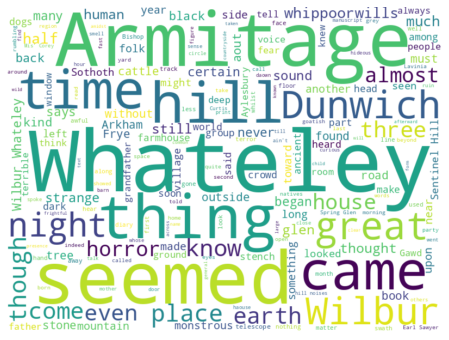

In [56]:
fig, ax = plt.subplots(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

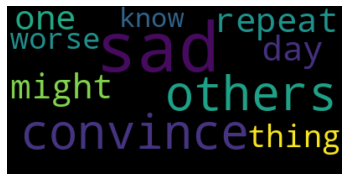

In [57]:
text = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'
wc = WordCloud().generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()